In [3]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Carga de archivos y análisis de datos

In [5]:
data = pd.read_csv("imdb_test_data.csv")
print(data.head(), "\n")
print(data.shape, "\n")
print(data.describe(), "\n")
print(data.isnull().any())

                                                   0  1
0  I did not enjoy the film Eraser whatsoever. It...  0
1  Be very afraid of anyone who likes this film. ...  0
2  The 3rd and last big screen spin off from the ...  0
3  Barely three and a half years after just scrap...  1
4  I'm a big fan of the demonic puppets. Looking ...  0 

(25000, 2) 

                 1
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000 

0    False
1    False
dtype: bool


<AxesSubplot:xlabel='1', ylabel='count'>

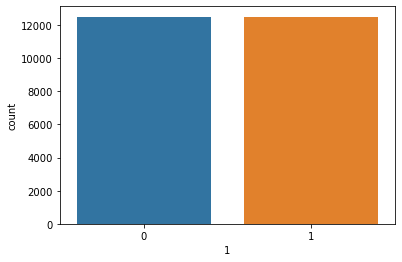

In [6]:
sns.countplot(x='1', data=data)

In [7]:
data["1"].value_counts()

1    12500
0    12500
Name: 1, dtype: int64

# Regresión logística y SVM

In [8]:
X = data['0']
y = data['1']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [10]:
X = cv.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import confusion_matrix, classification_report

def logisticR(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  logmodel = LogisticRegression(max_iter=1000)

  logmodel.fit(X_train, y_train)

  pred = logmodel.predict(X_test)

  print(confusion_matrix(y_test, pred))

  print(classification_report(y_test, pred))

  scores = cross_val_score(logmodel, X, y, cv=5, scoring='accuracy').mean()
  print(f"Cross validation mean: {scores}")

  return 

In [12]:
logisticR(X, y)

[[3306  442]
 [ 392 3360]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3748
           1       0.88      0.90      0.89      3752

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

Cross validation mean: 0.88696


In [20]:
from sklearn.svm import SVC

def svcR(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  model = SVC(max_iter=1000)

  model.fit(X_train, y_train)

  pred = model.predict(X_test)

  print(confusion_matrix(y_test, pred))

  print(classification_report(y_test, pred))

  scores = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
  print(f"Cross validation mean: {scores}")

In [21]:
svcR(X,y)

[[ 672 3037]
 [ 599 3192]]
              precision    recall  f1-score   support

           0       0.53      0.18      0.27      3709
           1       0.51      0.84      0.64      3791

    accuracy                           0.52      7500
   macro avg       0.52      0.51      0.45      7500
weighted avg       0.52      0.52      0.46      7500

Cross validation mean: 0.51312


In [24]:
from sklearn.metrics import roc_curve, auc

def plotRoc(X,y,log_model,svc_model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    log_model.fit(X_train, y_train)
    y_pred_logistic = log_model.predict(X_test)
      
    svc_model.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)

    logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
    auc_logistic = auc(logistic_fpr, logistic_tpr)

    svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)

    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
    plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')

    plt.legend()

    plt.show()



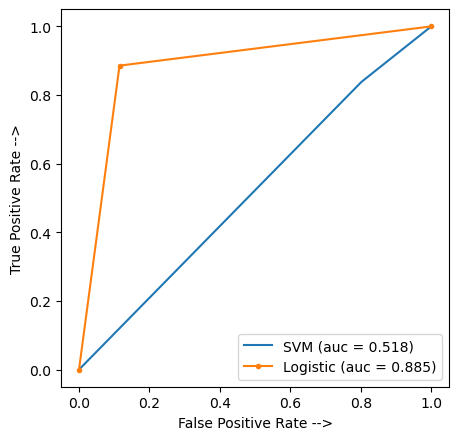

In [26]:
log_model = LogisticRegression(max_iter=1000)
svc_model = SVC(max_iter=1000)

plotRoc(X,y,log_model,svc_model)

# Usando procesamiento de texto

In [14]:
def text_process(words):
  # Eliminar signos de puntuacion
  # Eliminar palabras que no aportan al modelo (stopwords)
  nopunc = [char for char in words if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  nopunc_nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  nopunc_nostopwords = ' '.join(nopunc_nostopwords)

  return nopunc_nostopwords

# Probar otro metodo de normalizacion como stemming

In [28]:
# X_process = data["0"].apply(text_process)

In [36]:
# new_data = data.copy()
# new_data["clean_text"] = X_process
# new_data.to_csv("imdb_data_clean.csv", encoding='utf-8')

In [38]:
clean_data = pd.read_csv("imdb_data_clean.csv")
clean_data.head()

,Unnamed: 0,0,1,clean_text
0,0,I did not enjoy the film Eraser whatsoever. It...,0,enjoy film Eraser whatsoever awful acting bori...
1,1,Be very afraid of anyone who likes this film. ...,0,afraid anyone likes film probably inhaled many...
2,2,The 3rd and last big screen spin off from the ...,0,3rd last big screen spin popular ITV sitcom ea...
3,3,Barely three and a half years after just scrap...,1,Barely three half years scraping months run 73...
4,4,I'm a big fan of the demonic puppets. Looking ...,0,Im big fan demonic puppets Looking surface one...


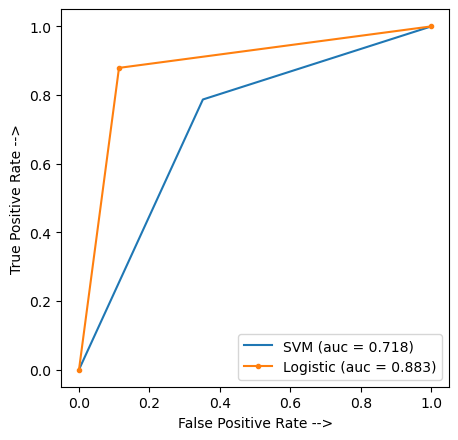

In [40]:
log_model = LogisticRegression(max_iter=1000)
svc_model = SVC(max_iter=1000)

clean_X = clean_data["clean_text"]
clean_X = cv.fit_transform(clean_X)

plotRoc(clean_X,y,log_model,svc_model)

### Transforma una matriz de recuento en una representación tf o tf-idf normalizada 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html



In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_verctor = TfidfVectorizer(max_features=5000)
tfidf_verctor.fit(clean_data["clean_text"])
Xtrain_tfidf = tfidf_verctor.transform(clean_data["clean_text"])

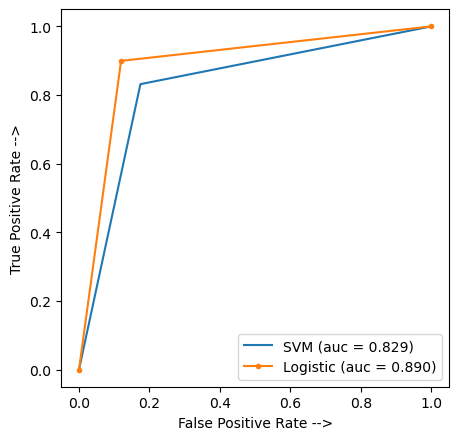

In [42]:
plotRoc(Xtrain_tfidf,y,log_model,svc_model)

## Buscando mejorar el model SVC implementando Grid Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [83]:
from sklearn.model_selection import GridSearchCV

# parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(SVC(max_iter=1000), parameters, verbose=3)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ......... C=1, gamma=1, kernel=linear, score=0.829, total=  18.7s
[CV] C=1, gamma=1, kernel=linear .....................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.6s remaining:    0.0s
[CV] ......... C=1, gamma=1, kernel=linear, score=0.829, total=  19.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.7s remaining:    0.0s
[CV] ......... C=1, gamma=1, kernel=linear, score=0.843, total=  19.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.817, total=  19.7s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.827, t

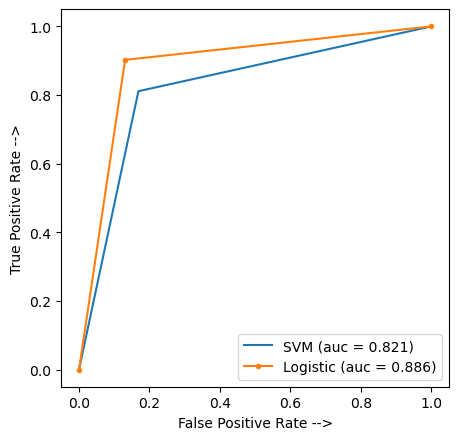

In [84]:
plotRoc(Xtrain_tfidf,y,log_model,grid)


In [85]:
# Kernel por defecto rbf
grid.best_estimator_

SVC(C=1, gamma=1, max_iter=1000)